In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fairness.pre_processing import categorical_to_numeric_converter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = pd.read_csv('./dataset/adult/adult.data', sep=',')

In [ ]:
print("Columns of the dataset")

In [3]:
dataset = categorical_to_numeric_converter(dataset)

In [4]:
output_column = "income"

In [5]:
X = dataset.iloc[:,:len(dataset.columns) - 2]
y = dataset.loc[:, output_column:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [9]:
svc_classifier = SVC()
random_forest_classifier = RandomForestClassifier()
decision_tree_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()

models = [
    svc_classifier,
    random_forest_classifier,
    decision_tree_classifier,
    knn_classifier
]

svc_params = {
    'kernel' : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'},
    'degree' : range(1, 10),
    'gamma' : {'scale', 'auto'}
}

random_forest_params = {
    'min_samples_leaf': [5, 7, 9, 11],
    'n_estimators': [200, 500],
    'max_depth' : [10, 20, 50, 80, 100, 150],
    'criterion' :['gini', 'entropy']
}

decision_tree_params = {
    'min_samples_leaf': [5, 7, 9, 11],
    'max_depth' : [10, 20, 50, 80, 100, 150],
    'criterion' :['gini', 'entropy']
}

knn_params = {
    'algorithm' : {'auto', 'ball_tree', 'kd_tree', 'brute'},
    'leaf_size': range(20, 50),
}


model_params = [svc_params, random_forest_params, decision_tree_params, knn_params]

In [10]:
best_params = None
max_accuracy = 0
best_model = None

for model_index in range(0, len(models)):
    
    grid_search = GridSearchCV(
    estimator=models[model_index],
    param_grid=model_params[model_index],
    scoring='accuracy', 
    return_train_score=True,
    cv=3
    )

    grid_search_classifier = grid_search.fit(X_train, y_train)
    y_pred = grid_search_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > max_accuracy:
        best_params = grid_search_classifier.best_params_
        best_model = models[model_index]

In [ ]:
print("Best model: ", best_model)
print("Best_params: ", best_params)
print("Accuracy: ", max_accuracy)

In [16]:
#print("Accuracy score on Test set: ", accuracy_score(y_test, y_pred))
#print("Accuracy score on Train set: ", accuracy_score(y_train, grid_search_classifier.predict(X_train)))
#print(classification_report(y_test, y_pred))

Accuracy score on Test set:  0.8442211055276382
Accuracy score on Train set:  0.9103369241347696
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8196
           1       0.73      0.54      0.62      2550

    accuracy                           0.84     10746
   macro avg       0.80      0.74      0.76     10746
weighted avg       0.84      0.84      0.84     10746



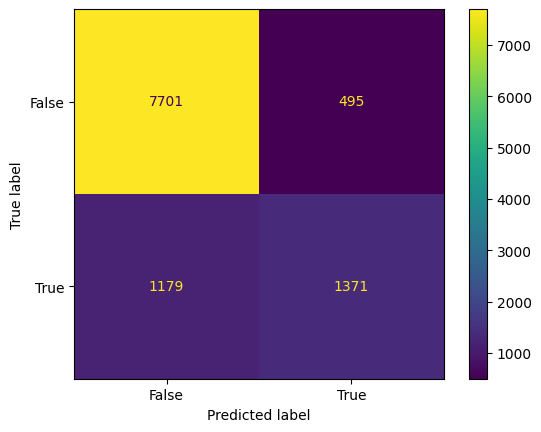

In [17]:
#cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
#cm_display.plot()
#plt.show()